In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/snow/scikit_learn_data


In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [5]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


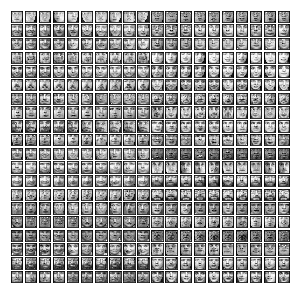

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(5, 5))
for i in range(400):
    p = fig.add_subplot(20, 20, i + 1,xticks=[], yticks=[])
    p.imshow(faces.images[i], cmap="gray")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, faces.data, faces.target, cv=3)
scores

array([0.9125    , 0.96666667, 0.95833333])

In [14]:
avg_across_folds = scores.mean()
avg_across_folds

0.9458333333333333

In [19]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.05)


In [15]:
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
clf.score(X_test, y_test)

0.99

In [20]:
peopleindexwithglass=[(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
                      (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
                      (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
                      (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
                      (330, 339), (358, 359), (360, 369)]

In [22]:
faces.data[:2]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256]], dtype=float32)

In [25]:
people_with_glasses_data = []
people_with_glasses_target = []

for r in peopleindexwithglass:
    for i in range(r[0], r[1]):
        people_with_glasses_data.append(faces.data[i])
        people_with_glasses_target.append(faces.target[i])

import numpy as np
people_with_glasses_data = np.array(people_with_glasses_data)
people_with_glasses_target = np.array(people_with_glasses_target)

print(people_with_glasses_data.shape)
print(people_with_glasses_target.shape)

(96, 4096)
(96,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(people_with_glasses_data, people_with_glasses_target, test_size=0.25, random_state=0)
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [27]:
clf.score(X_train, y_train)

1.0

In [28]:
clf.predict(X_test)

array([12, 33,  1, 26, 30, 33,  5, 33, 26, 27, 26, 36, 30,  5,  1, 13, 12,
       12, 13,  1, 18, 27,  1,  5])

In [29]:
clf.score(X_test, y_test)

0.9583333333333334

In [80]:
check = []
for i in range(len(X_test[0])):
    check.append(True)
check = np.array(check)
check = check.reshape(1,4096)

In [100]:
x = np.where((faces.data == X_test[0]).all(1) == True)
x[0][0]

127

In [102]:
idxs = []
for i in range(len(X_test)):
    idx = np.where((faces.data == X_test[i]).all(1) == True)
    idxs.append(idx[0][0])

In [103]:
idxs

[127,
 337,
 12,
 265,
 300,
 334,
 54,
 331,
 264,
 277,
 263,
 361,
 303,
 51,
 17,
 132,
 120,
 125,
 135,
 18,
 180,
 273,
 13,
 358]

In [94]:
faces.data[127]

array([0.18595041, 0.16528925, 0.1694215 , ..., 0.42561984, 0.38842976,
       0.45454547], dtype=float32)

In [95]:
X_test[0]

array([0.18595041, 0.16528925, 0.1694215 , ..., 0.42561984, 0.38842976,
       0.45454547], dtype=float32)

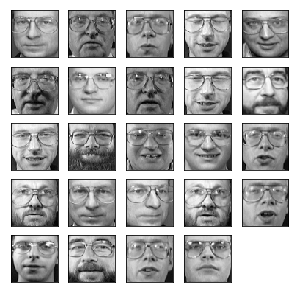

In [106]:
fig = plt.figure(figsize=(5, 5))

for i in range(len(idxs)):
    p = fig.add_subplot(5, 5, i + 1,xticks=[], yticks=[])
    p.imshow(faces.images[idxs[i]], cmap="gray")

In [107]:
len(idxs)

24